# Importing **Dataset** and visualizing it.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0],train_data[0].shape,train_labels[0],train_labels[0].shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

# **Preprocessing** the data

In [ ]:
train_data_normalized = (train_data -np.min(train_data))/np.max(train_data)
test_data_normalized = (test_data -np.min(test_data))/np.max(test_data)

In [ ]:
train_data_normalized[0],train_data_normalized[0].shape

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
train_data_flatten = train_data_normalized.reshape(train_data_normalized.shape[0],784)
test_data_flatten = test_data_normalized.reshape(test_data_normalized.shape[0],784)
train_data_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
classes =[
                    "T-shirt/top",
                    "Trouser",
                    "Pullover",
                    "Dress",
                    "Coat",
                    "Sandal",
                    "Shirt",
                    "Sneaker",
                    "Bag",
                    "Ankle boot",
                ]

# Visualizing Data

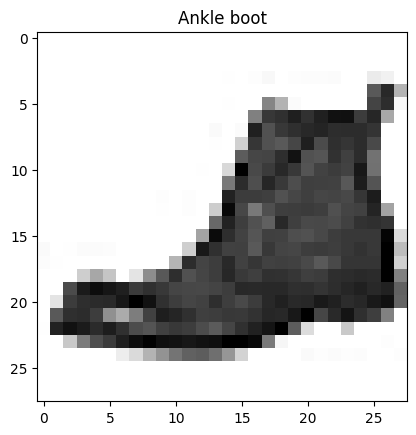

In [ ]:
import random

def visualize_data(data,labels,classes):
  rand_index = random.randint(0,len(data))
  plt.imshow(data[rand_index],cmap="binary")
  plt.title(classes[labels[rand_index]])

visualize_data(train_data,train_labels,classes)

# Creating Model

In [ ]:
from os import name
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(units=10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=128,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*(10**(epoch/20)))

Here do not make the model too complex, as lack of dense info in the data, may lead to extremenly poor accuracy give out by complex model as info is not that dense enough to drive the model complexity

# Training Model

In [ ]:
train_data_flatten.shape,train_labels.shape

((60000, 784), (60000,))

In [ ]:
history = model.fit(train_data_flatten,train_labels,epochs=10,callbacks=[lr])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5004 - loss: 1.4742 - learning_rate: 1.0000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7897 - loss: 0.6105 - learning_rate: 1.1220e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8146 - loss: 0.5271 - learning_rate: 1.2589e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8272 - loss: 0.4873 - learning_rate: 1.4125e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8373 - loss: 0.4575 - learning_rate: 1.5849e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8461 - loss: 0.4365 - learning_rate: 1.7783e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8503 - loss: 0.4223 - learning_rate: 1.9953e-04
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8562 - loss: 0.4108 - learning_rate: 2.2387e-04
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8554

## Visualizing Loss VS Learning Rate

<Axes: title={'center': 'Loss Vs Lr'}>

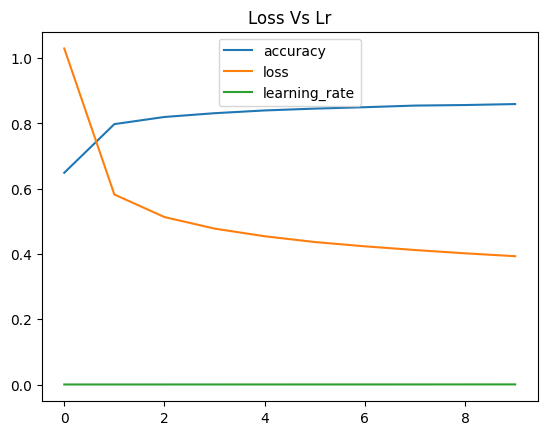

In [ ]:
pd.DataFrame(history.history).plot(title="Loss Vs Lr")

Roughly at around 2 epoch it ahs better loss decrease , at epoch 2 we have lr =0.00012

In [ ]:
1e-4*(10**0.1)

0.00012589254117941674

# Optimizing the model

In [ ]:

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(units=10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=128,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax),
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.000125),metrics=["accuracy"])

history_2 = model_2.fit(train_data_flatten,train_labels,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5468 - loss: 1.3363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8033 - loss: 0.5654
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8303 - loss: 0.4905
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8384 - loss: 0.4680
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8465 - loss: 0.4431
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8463 - loss: 0.4389
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8546 - loss: 0.4161
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8535 - loss: 0.4150
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8561 - loss: 0.4065
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.4012
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8638 - loss: 0.3897
Epoch 12/20
1875/1875 ━━━━━━━━

# Evaluating Model

In [ ]:
y_prob = model_2.predict(test_data_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = np.argmax(y_prob,axis=1)

In [ ]:
y_pred,test_labels

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [ ]:
model_2.evaluate(test_data_flatten,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.4116


[0.4216381907463074, 0.8496999740600586]

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,y_pred)
cm

array([[742,   2,   7,  54,   5,   2, 171,   0,  17,   0],
       [  3, 959,   2,  27,   4,   0,   4,   0,   1,   0],
       [  9,   1, 671,  12, 160,   0, 135,   0,  12,   0],
       [ 13,  10,   8, 859,  50,   0,  53,   0,   7,   0],
       [  0,   0,  58,  24, 804,   1, 104,   0,   9,   0],
       [  0,   0,   0,   1,   0, 923,   0,  46,   4,  26],
       [ 99,   2,  71,  34,  77,   1, 694,   0,  22,   0],
       [  0,   0,   0,   0,   0,  25,   0, 943,   0,  32],
       [  0,   2,   5,   8,   4,   3,  13,   5, 960,   0],
       [  1,   0,   0,   0,   0,  10,   1,  46,   0, 942]])

In [ ]:
cm.shape

(10, 10)

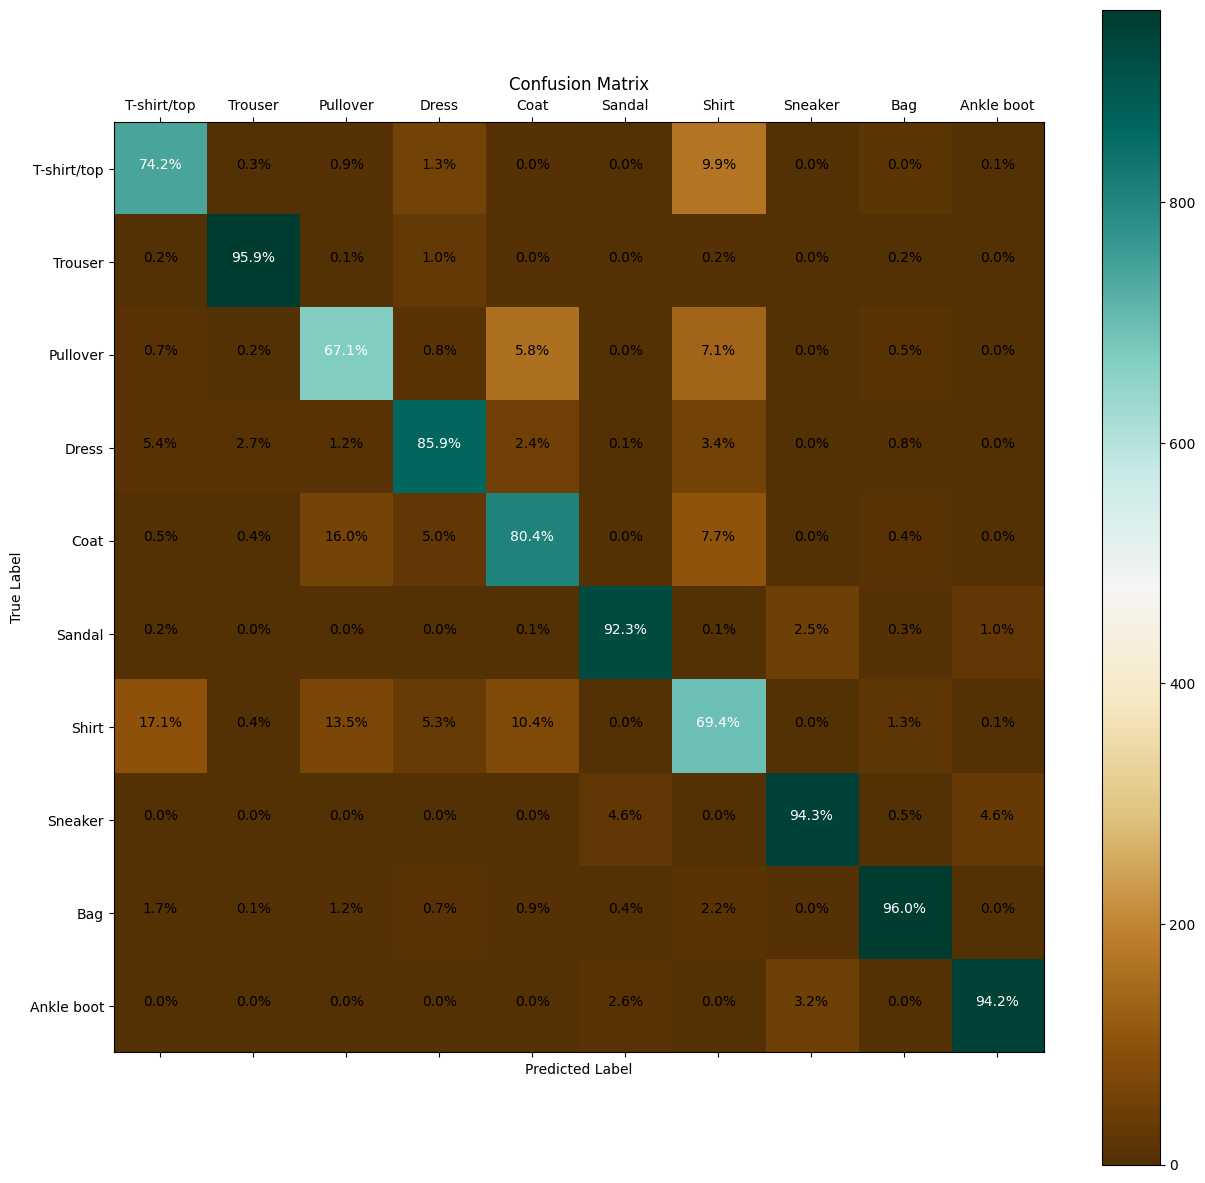

In [ ]:
import itertools
def visualize_cm(y_true,y_pred,classes,figsize=(15,15),text_size=10):
  cm = confusion_matrix(test_labels,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)
  n_classes = cm_norm.shape[0]
  fig,ax= plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.BrBG)
  fig.colorbar(cax)
  ax.set(title="Confusion Matrix",xlabel="Predicted Label",ylabel="True Label",xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=classes,yticklabels=classes)
  threshold = (np.max(cm)+np.min(cm))/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    ax.text(i,j,f"{cm_norm[i,j]*100:.1f}%",horizontalalignment="center",color="white" if cm[i,j]>threshold else "black",size=text_size)


visualize_cm(test_labels,y_pred,classes)